In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report

In [2]:
df = pd.read_csv("C:/AI_study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [4]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Features
- id: id
- Sex: 성별 M(수컷), F(암컷), I(유아기)
- Length: 길이(앞에서 뒤까지, mm)
- Diameter: 지름(길이에 수직인 방향, mm)
- Height: 높이(껍질 포함, mm)
- Whole_weight: 전체 무게(껍질 포함, g)
- Shucked_weight: 무게(껍질 제거, g)
- Viscera_weight: 전복 내장 무게(g)
- Shell_weight: 건조 후 껍질 무게(g)
- Rings: 나선(전복의 나이 추정, 나이 = Rings + 1.5) - label

- 현재 Features 중 id의 경우는 단순히 0 ~ 4176까지 나열한 것이므로 필요 없음
- Sex의 경우 object형으로 M, F, I를 값으로 가지기 때문에 EDA하고 모델에 넣기 위해 Label Encoding이 필요

In [5]:
# 필요 없는 Feature인 id 제거
df = df.drop('id', axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


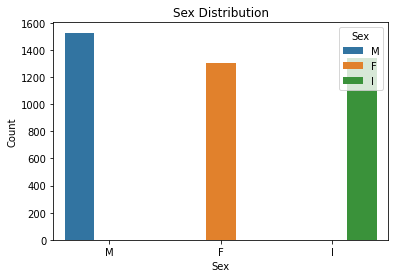

In [6]:
# Sex 분포 시각화
sns.countplot(data=df, x="Sex", hue="Sex", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

plt.show()

In [7]:
# Sex 피처에 Label Encoding 적용

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

df['Sex_encoded'] = le.fit_transform(df['Sex'])

df = df.drop('Sex', axis=1)
df.insert(0, 'Sex_encoded', df.pop('Sex_encoded'))

# 결과 확인
print(df)

      Sex_encoded  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0               2   0.455     0.365   0.095        0.5140          0.2245   
1               2   0.350     0.265   0.090        0.2255          0.0995   
2               0   0.530     0.420   0.135        0.6770          0.2565   
3               2   0.440     0.365   0.125        0.5160          0.2155   
4               1   0.330     0.255   0.080        0.2050          0.0895   
...           ...     ...       ...     ...           ...             ...   
4172            0   0.565     0.450   0.165        0.8870          0.3700   
4173            2   0.590     0.440   0.135        0.9660          0.4390   
4174            2   0.600     0.475   0.205        1.1760          0.5255   
4175            0   0.625     0.485   0.150        1.0945          0.5310   
4176            2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1

In [8]:
df.describe()

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
# 데이터 결측치 확인
df.isnull().sum()

Sex_encoded       0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

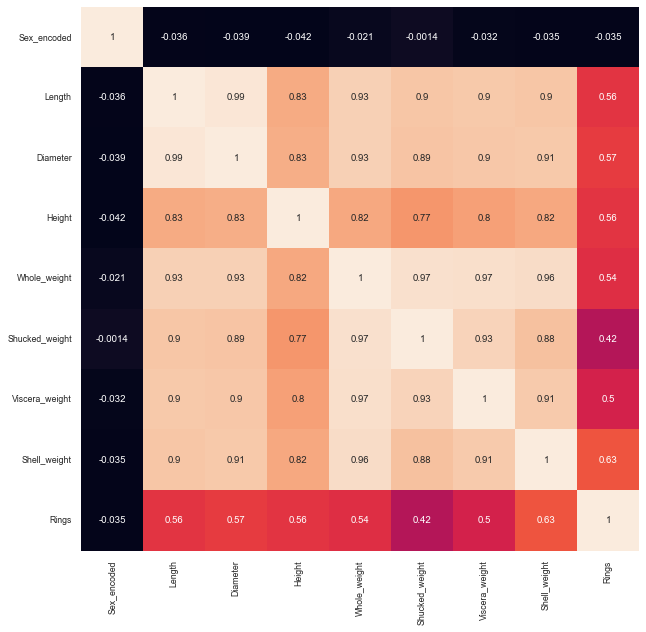

In [11]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Target인 Rings와 가장 높은 상관 관계를 맺는 feature
- Shell_weight(0.63)

## Target인 Rings와 비교적 낮은 상관 관계를 맺는 features
- Sex_encoded(-0.035)
- Shucked_weight(0.42)
- Visvera_weight(0.5)

- Sex_encoded의 경우 매우 낮은 상관 관계를 갖고 있기 때문에 추후에 삭제 가능 

array([[<AxesSubplot:title={'center':'Sex_encoded'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Shucked_weight'}>],
       [<AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

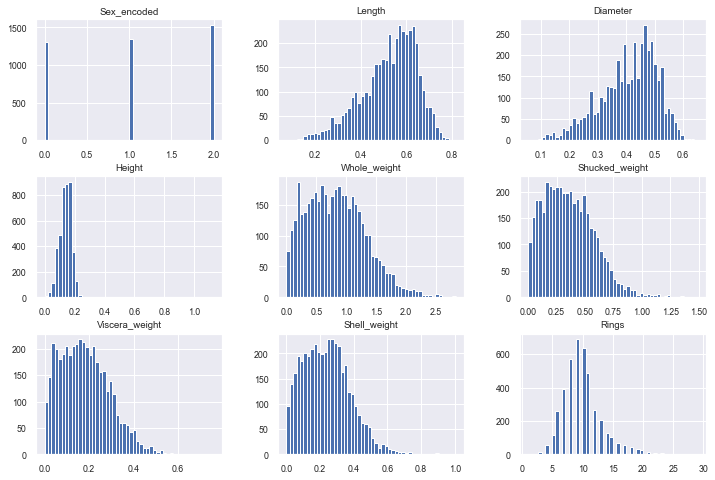

In [12]:
df.hist(bins=50, figsize=(12, 8))

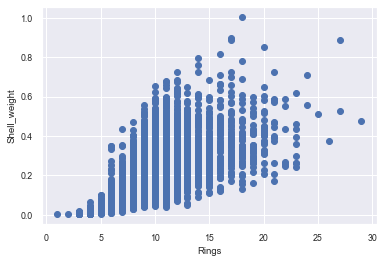

In [13]:
# Rings와 Shell_weight 관계
plt.scatter(df['Rings'], df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

plt.show()

In [14]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Sex_encoded       1307
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


#### Height(높이)가 0 값이 나오는 것은 이상치로 판단

In [15]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Height'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  4177
제거 후 데이터 개수:  4175


2개의 데이터 제거

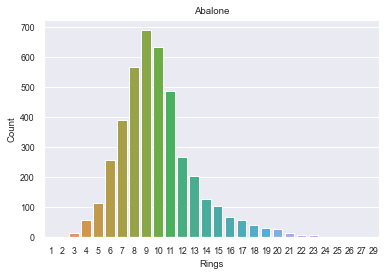

In [16]:
# Rings 시각화
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

plt.show()

In [17]:
y = df['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [18]:
X = df.drop('Rings', axis=1)
X

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3340, 8), (835, 8), (3340,), (835,))

In [20]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

## RandomizedSearchCV를 사용해서 하이퍼 파라미터 튜닝

## ML_DecisionTreeRegressor

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint

# 1. 하이퍼파라미터 범위를 randint로 설정
param_dist = {
    'max_depth': randint(3, 11),           # 3부터 10까지의 랜덤 값
    'min_samples_split': randint(2, 11),   # 2부터 10까지의 랜덤 값
    'min_samples_leaf': randint(1, 11)     # 1부터 10까지의 랜덤 값
}

# MSE 스코어를 사용하여 랜덤 서치 수행
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 2. RandomizedSearchCV 설정
clf_dt = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator=clf_dt, param_distributions=param_dist, n_iter=100, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 하이퍼파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 9}
최적의 MSE:  5.480258118455512


In [22]:
from sklearn.model_selection import cross_val_score

# 3. 최적의 하이퍼파라미터로 모델 평가
best_clf_dt = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_dt, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [5.81060711 5.65799744 5.34154541 5.311914   5.30025683]
평균 MSE: 5.484464157420421


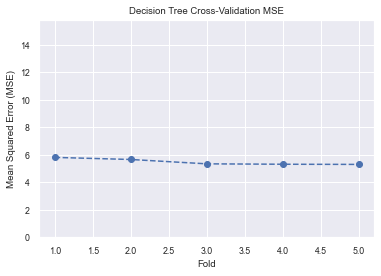

Mean MSE across folds: 5.484464157420421


In [23]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('Decision Tree Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_dt.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- Decision Tree Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- Decision Tree Regressor ---
Mean Squared Error (MSE): 5.383921470079721
Mean Absolute Error (MAE): 1.6334570881277848
R² Score: 0.488806451154871


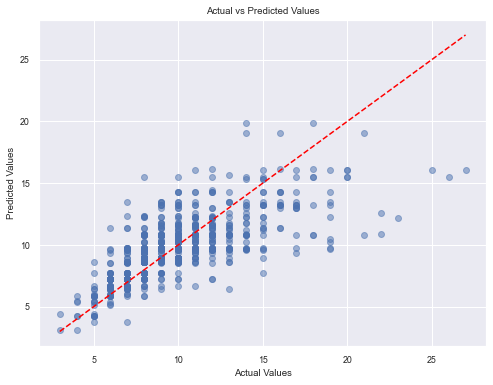

In [25]:
import matplotlib.pyplot as plt

# 회귀 모델의 예측 값과 실제 값
y_pred = best_clf_dt.predict(test_scaled)  # 예측 값
y_test = y_test  # 실제 값

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## ML_LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# 1. 하이퍼파라미터 분포 정의 (랜덤 탐색을 위한 범위 설정)
param_dist = {
    'fit_intercept': [True, False],  # 절편 포함 여부
    'n_jobs': [None, -1]             # 병렬 처리 설정
}

# 2. MSE 스코어 설정 (회귀 문제이므로 Mean Squared Error를 사용)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 3. RandomizedSearchCV 설정 (LinearRegression 모델 사용)
clf_lr = LinearRegression()
random_search = RandomizedSearchCV(estimator=clf_lr, param_distributions=param_dist, n_iter=5, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 4. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 5. 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 6. 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적의 하이퍼파라미터:  {'n_jobs': None, 'fit_intercept': True}
최적의 MSE:  5.066916534254136


C:\Users\User\.conda\envs\test01\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [27]:
# 3. 최적의 하이퍼파라미터로 최적의 모델 평가
best_clf_lr = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_lr, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [4.96151068 4.80546614 5.38017302 5.63659838 4.55083446]
평균 MSE: 5.066916534254136


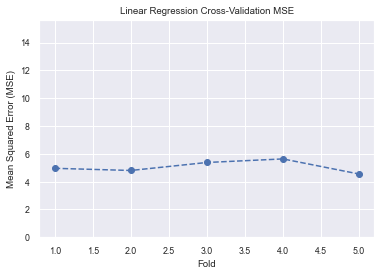

Mean MSE across folds: 5.066916534254136


In [28]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('Linear Regression Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_lr.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- Linear Regression Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- Linear Regression Regressor ---
Mean Squared Error (MSE): 4.956816654953827
Mean Absolute Error (MAE): 1.6165142290739496
R² Score: 0.5293592763374819


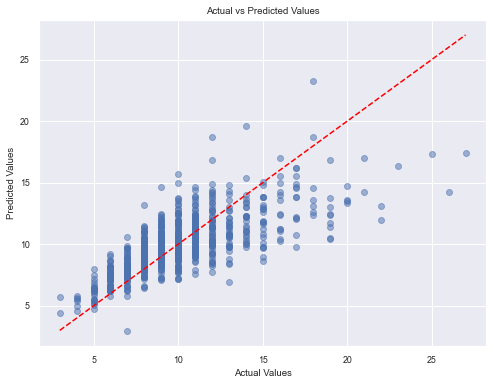

In [30]:
import matplotlib.pyplot as plt

# 회귀 모델의 예측 값과 실제 값
y_pred = best_clf_lr.predict(test_scaled)  # 예측 값
y_test = y_test  # 실제 값

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## ML_SVR

In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import uniform

# 1. 하이퍼파라미터 분포 정의 (랜덤 탐색을 위한 범위 설정)
param_dist = {
    'C': uniform(0.1, 10),              # 규제 강도 (C)
    'epsilon': uniform(0.01, 1),        # 허용 오차 (epsilon)
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # 커널 함수 선택
    'degree': [2, 3, 4],                # 다항 커널의 차수 (poly 커널에만 해당)
    'gamma': ['scale', 'auto']          # 커널 계수 (rbf, poly, sigmoid에만 해당)
}

# 2. MSE 스코어 설정 (회귀 문제이므로 Mean Squared Error를 사용)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 3. RandomizedSearchCV 설정 (SVR 모델 사용)
clf_svr = SVR()
random_search = RandomizedSearchCV(estimator=clf_svr, param_distributions=param_dist, n_iter=100, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 4. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 5. 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 6. 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 하이퍼파라미터:  {'C': 7.39606178338064, 'degree': 3, 'epsilon': 0.8972127425763265, 'gamma': 'scale', 'kernel': 'rbf'}
최적의 MSE:  4.560781672001369


In [32]:
# 3. 최적의 하이퍼파라미터로 최적의 모델 평가
best_clf_svr = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_svr, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [4.73193969 4.68834336 4.92769926 4.26906881 4.18685723]
평균 MSE: 4.560781672001369


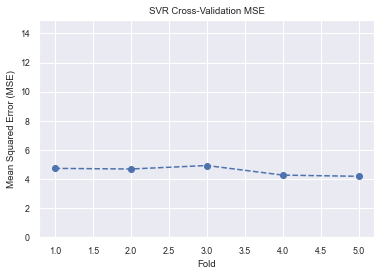

Mean MSE across folds: 4.560781672001369


In [33]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('SVR Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_svr.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- SVR Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- SVR Regressor ---
Mean Squared Error (MSE): 4.857122472453556
Mean Absolute Error (MAE): 1.4963484507204141
R² Score: 0.538825057596504


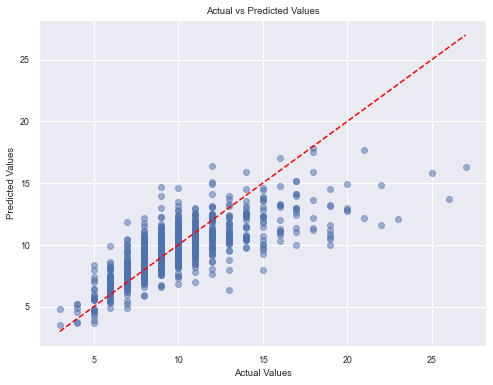

In [35]:
import matplotlib.pyplot as plt

# 회귀 모델의 예측 값과 실제 값
y_pred = best_clf_svr.predict(test_scaled)  # 예측 값
y_test = y_test  # 실제 값

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 기준선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## ML_RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint, uniform

# 1. 하이퍼파라미터 분포 정의 (랜덤 탐색을 위한 범위 설정)
param_dist = {
    'n_estimators': randint(50, 500),       # 트리의 개수
    'max_depth': randint(3, 20),            # 트리의 최대 깊이
    'min_samples_split': randint(2, 20),    # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': randint(1, 10),     # 리프 노드가 되기 위한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'], # 각 트리에서 고려할 최대 특성 수
    'bootstrap': [True, False],             # 부트스트랩 샘플링 여부
}

# 2. MSE 스코어 설정 (회귀 문제이므로 Mean Squared Error를 사용)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 3. RandomizedSearchCV 설정 (RandomForestRegressor 모델 사용)
clf_rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=clf_rf, param_distributions=param_dist, n_iter=100, cv=5, scoring=mse_scorer, n_jobs=-1, verbose=2, random_state=42)

# 4. 모델 학습 및 랜덤 서치 수행
random_search.fit(train_scaled, y_train)

# 5. 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", random_search.best_params_)

# 6. 최적의 하이퍼파라미터로 평가된 평균 MSE 출력
print("최적의 MSE: ", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적의 하이퍼파라미터:  {'bootstrap': True, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 207}
최적의 MSE:  4.569534127908533


In [37]:
# 3. 최적의 하이퍼파라미터로 최적의 모델 평가
best_clf_rf = random_search.best_estimator_

# MSE 스코어로 K-Fold 교차 검증 (K=5)
scores = cross_val_score(best_clf_rf, train_scaled, y_train, cv=5, scoring=mse_scorer)

# 각 폴드에서의 성능 및 평균 성능 출력
print("교차 검증 성능 (MSE, 각 폴드):", -scores)
print("평균 MSE:", -scores.mean())

교차 검증 성능 (MSE, 각 폴드): [4.98218505 4.58684394 4.67426216 4.42643426 4.17794523]
평균 MSE: 4.569534127908533


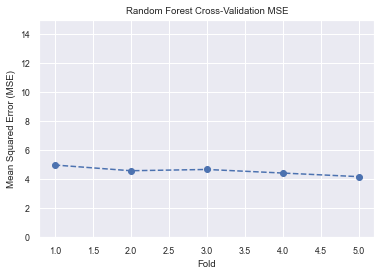

Mean MSE across folds: 4.569534127908533


In [38]:
# 교차 검증 결과 시각화 (MSE를 음수 값으로 변환했으므로, -scores 사용)
plt.plot(range(1, 6), -scores, marker='o', linestyle='--')
plt.title('Random Forest Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(-scores) + 10])  # Y축을 0부터 최대 MSE 값 + 약간의 여유로 설정
plt.show()

# 평균 MSE 출력 (평균 MSE는 음수로 계산된 값을 다시 양수로 변환)
print(f"Mean MSE across folds: {-scores.mean()}")

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 회귀 모델 예측
y_pred_reg = best_clf_rf.predict(test_scaled)

# MSE, MAE, R² 스코어 계산
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

# 결과 출력
print("\n--- Random Forest Regressor ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


--- Random Forest Regressor ---
Mean Squared Error (MSE): 4.723849988404894
Mean Absolute Error (MAE): 1.5151253128016149
R² Score: 0.5514790374999725
